In [1]:
import numpy as np
import pandas as pd
import altair as alt
# alt.data_transformers.disable_max_rows()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from altair import pipe, limit_rows, to_values
t = lambda data: pipe(data, limit_rows(max_rows=20000), to_values)
alt.data_transformers.register('custom', t)
alt.data_transformers.enable('custom')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [18]:
# this is needed for saving altair plots as png
import selenium
from selenium import webdriver
# note: requires chromedriver.exe to be in same folder as this file
# this is only way I could get altair plots to save
# I am not pushing the chromedriving to github, to replicate the save
# code in this document, a new user would have to make sure they 
# specify a path to chromedriver
browser = webdriver.Chrome('chromedriver.exe')

In [3]:
data1 = pd.read_csv('../data/raw/data_fifa.csv', index_col = 0)
data1.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
X = data1.drop(columns = ['Wage'])
y = data1['Wage']

Splitting data set into train and test in order to test better. 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
df = pd.concat([X_train, y_train], axis=1)

Dropping unrelated columns. These columns have no effect or negligible effect on target column.

In [6]:
df = df.drop(columns = ['ID', 'Photo', 'Flag', 'Club Logo', 'Loaned From','Joined', 'Contract Valid Until'])
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Special,Preferred Foot,International Reputation,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Wage
17472,H. Brockbank,19,England,54,66,Bolton Wanderers,€100K,1244,Right,1.0,...,55.0,56.0,60.0,9.0,14.0,8.0,14.0,12.0,€210K,€1K
5971,E. Konsa,20,England,69,80,Brentford,€1.6M,1700,Right,1.0,...,70.0,69.0,70.0,14.0,8.0,11.0,13.0,9.0,€3.4M,€13K
10264,Sidnei Dalmeira,30,Brazil,65,65,Sport Club do Recife,€400K,1543,Right,1.0,...,76.0,62.0,59.0,18.0,14.0,10.0,11.0,18.0,€760K,€4K
176,M. Kovačić,24,Croatia,83,89,Chelsea,€35M,2115,Right,3.0,...,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN,€165K
3780,L. Díaz,21,Colombia,72,83,Junior FC,€5.5M,1706,Right,1.0,...,28.0,36.0,34.0,10.0,13.0,13.0,14.0,14.0,€8.8M,€3K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14565 entries, 17472 to 15795
Data columns (total 81 columns):
Name                        14565 non-null object
Age                         14565 non-null int64
Nationality                 14565 non-null object
Overall                     14565 non-null int64
Potential                   14565 non-null int64
Club                        14367 non-null object
Value                       14565 non-null object
Special                     14565 non-null int64
Preferred Foot              14531 non-null object
International Reputation    14531 non-null float64
Weak Foot                   14531 non-null float64
Skill Moves                 14531 non-null float64
Work Rate                   14531 non-null object
Body Type                   14531 non-null object
Real Face                   14531 non-null object
Position                    14520 non-null object
Jersey Number               14520 non-null float64
Height                      14531 non

There are 14565 rows in the data and around 3K NA values. So we can drop NAN rows to get better visualizations.

In [8]:
df = df.dropna()

Columns `Wage`, `Value` and `Release Clause` have currency values that are hard to visualize. I will convert those columns just numbers in 1000 (K). 

In [9]:
df['Wage'] = df['Wage'].replace({'K': '', 'M': '*1e3', '€' : ""}, regex=True).map(pd.eval).astype(int)
df['Value'] = df['Value'].replace({'K': '', 'M': '*1e3', '€' : ""}, regex=True).map(pd.eval).astype(int)
df['Release Clause'] = df['Release Clause'].replace({'K': '', 'M': '*1e3', '€' : ""}, regex=True).map(pd.eval).astype(int)

Attribute `Height` and `Weight` can be merged into one attribute called `BMI` aka body mass index. And remove original `Height` and `Weight` columns.

In [10]:
def convert_heigt_inches(height_str):
    height = height_str.split("'")
    return int(height[0]) * 12 + int(height[1])

df['Height_Inches'] = df['Height'].apply(convert_heigt_inches).astype(int)
df['Weight_Pounds'] = df['Weight'].replace({'lbs': ''}, regex=True).astype(int)
df['BMI'] = (df['Weight_Pounds']/df['Height_Inches']**2)*703
df = df.drop(columns = ['Height_Inches', 'Weight_Pounds', 'Weight', 'Height'])
df['BMI'].head()

17472    22.452490
5971     23.053627
10264    22.162507
3780     22.452490
2358     24.745600
Name: BMI, dtype: float64

Club attribute can be converted to numeric score like `Club_Value`, `Club_Wage`, `Club_Overall` and `Club_Potential` to relate with players wages.

In [11]:
def get_club_stat(x, df, name):
    return df[df['Club'] == x][name].values[0]

club_df = df.groupby(['Club'])['Value'].agg('sum').reset_index()
df['Club_Value'] = df['Club'].apply(lambda x: get_club_stat(x, club_df, 'Value'))

club_df = df.groupby(['Club'])['Wage'].agg('sum').reset_index()
df['Club_Wage'] = df['Club'].apply(lambda x: get_club_stat(x, club_df, 'Wage'))

club_df = df.groupby(['Club'])['Overall'].agg('mean').reset_index()
df['Club_Overall'] = df['Club'].apply(lambda x: get_club_stat(x, club_df, 'Overall'))

club_df = df.groupby(['Club'])['Potential'].agg('mean').reset_index()
df['Club_Potential'] = df['Club'].apply(lambda x: get_club_stat(x, club_df, 'Potential'))

club_info = df.drop_duplicates('Club')[['Club', 'Club_Value', 'Club_Wage', 'Club_Overall', 'Club_Potential']].reset_index().drop(columns = ['index'])

Most richest 5 clubs: 

In [12]:
club_info.nlargest(5, 'Club_Wage')

,Club,Club_Value,Club_Wage,Club_Overall,Club_Potential
418,FC Barcelona,535525,3180,78.363636,85.272727
332,Real Madrid,554950,3053,78.400000,85.500000
586,Manchester City,642085,3039,78.250000,85.125000
543,Juventus,505775,2406,82.705882,85.823529
231,Arsenal,391615,2265,76.000000,81.615385


We can look at the correlation matrix to see which features have a high correlation with the wage. These features will be valuable to use for our analysis.

In [13]:
c = df.corr().abs()
c.nlargest(20, 'Wage')['Wage']

Wage                        1.000000
Value                       0.857134
Release Clause              0.849757
Club_Wage                   0.777803
Club_Value                  0.710760
International Reputation    0.679087
Overall                     0.583414
Club_Potential              0.537624
Club_Overall                0.530297
Reactions                   0.514163
Potential                   0.494887
Composure                   0.466458
Special                     0.459889
BallControl                 0.431291
ShortPassing                0.422902
Vision                      0.343378
Dribbling                   0.334350
LongPassing                 0.331786
Skill Moves                 0.326480
ShotPower                   0.324456
Name: Wage, dtype: float64

The `Club` information like `Club_Value`, `Club_Wage`, `Club_Overall`, `Club_Potential` will be good to analyse and also some skill set of the players such as `Reaction`, `Composure`, `BallControl`, `ShortPassing` and also `Drippling` are some important features to use.

We also need to be aware of that there might be some other features highly related with the wage, but not having highly positive and negative correlations such as `Age` and `BMI`.

In [19]:
p_age = alt.Chart(df).mark_bar().encode(
            alt.X("Age",  bin=alt.Bin(maxbins=30)),
            y='count()',
            ).properties( 
                        width = 300, 
                        height = 200, 
                        title= 'Distribution of Age')
p_overall = alt.Chart(df).mark_bar().encode(
                alt.X("Overall", bin = True),
                y='count()',
                ).properties( 
                        width = 300, 
                        height = 200, 
                        title= 'Distribution of overall score')
#p_age | p_overall
p_age_overall = p_age | p_overall
p_age_overall.save('../results/eda/p_age_overall.png')

![](../results/eda/p_age_overall.png)

The the distribution of `Age` shows that the players are generally between the age 20 and 35. When we look at the overall ratings, there are only a few players having greater than 90, the general overall rating is around 65-70.

We can also look at the relationship between `Age` and `Wage` as well as `Overall` and `Wage`.

In [20]:
p1 = alt.Chart(df).mark_point().encode(
        x=alt.X('Age', title='Age of the player'),
        y=alt.Y('Wage', title='Wage(in K)')
            ).properties(width = 400, 
                     height = 300, 
                     title= 'The relationship between Age and Salary')
p2 = alt.Chart(df).mark_point().encode(
        x=alt.X('Overall', title='Overall rating of the player'),
        y=alt.Y('Wage', title='Wage(in K)')
            ).properties(width = 400, 
                     height = 300, 
                     title= 'The relationship between Overall and Salary')
p_1_and_2 = p1 | p2
p_age_overall.save('../results/eda/p_1_and_2.png')

![](../results/eda/p_1_and_2.png)
The first plot shows that the players of the age between 20 and 30 earning the most and after the age of 35 the wage drastically drops. The second plot suggests that there are high number of players having overall rating between 70-80 and the players with rating higher than 85 have very high salaries. 

In [15]:
#alt.Chart(data1).mark_bar().encode(
#    alt.Y("Nationality", sort = '-x'),
#    x='count()',
#    ).properties(
#    title= 'Distribution of Nationality')

Looking at the distribution of the `Wage` will also be important to understand the dataset. 

Text(0.5, 1.0, 'The distribution of wage')

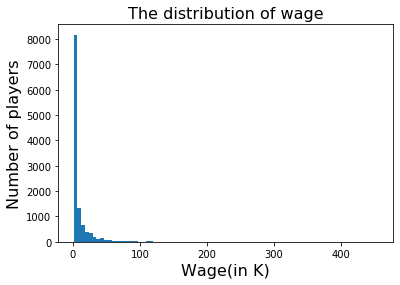

In [16]:
plt.hist(df.Wage, bins = 80)
# set x-axis label and specific size
plt.xlabel('Wage(in K)',size=16)
# set y-axis label and specific size
plt.ylabel('Number of players',size=16)
# set plot title with specific size
plt.title('The distribution of wage',size=16)

So, we see that the distribution of the salary is higly skewed and there some outliers. We can also explore the information about these outliers..

In [17]:
df_outliers = df.nlargest(8, 'Wage')
df_outliers

,Name,Age,Nationality,Overall,Potential,Club,Value,Special,Preferred Foot,International Reputation,...,GKKicking,GKPositioning,GKReflexes,Release Clause,Wage,BMI,Club_Value,Club_Wage,Club_Overall,Club_Potential
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000,2346,Right,5.0,...,31.0,33.0,37.0,164000,455,25.765818,535525,3180,78.363636,85.272727
6,L. Modrić,32,Croatia,91,91,Real Madrid,67000,2280,Right,4.0,...,7.0,14.0,9.0,137400,420,22.196799,554950,3053,78.400000,85.500000
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000,2228,Right,5.0,...,15.0,14.0,11.0,127100,405,23.493243,505775,2406,82.705882,85.823529
36,G. Bale,28,Wales,88,88,Real Madrid,60000,2279,Left,4.0,...,11.0,5.0,6.0,123000,355,23.877463,554950,3053,78.400000,85.500000
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000,2281,Right,4.0,...,5.0,10.0,13.0,196400,355,21.476294,642085,3039,78.250000,85.125000
11,T. Kroos,28,Germany,90,90,Real Madrid,76500,2190,Right,4.0,...,13.0,7.0,10.0,156800,355,22.782407,554950,3053,78.400000,85.500000
5,E. Hazard,27,Belgium,91,91,Chelsea,93000,2142,Right,4.0,...,6.0,8.0,8.0,172100,340,24.781358,416355,2251,76.952381,82.761905
32,Coutinho,26,Brazil,88,89,FC Barcelona,69500,2175,Right,3.0,...,9.0,14.0,6.0,147700,340,22.804931,535525,3180,78.363636,85.272727


In [18]:
club_info.nlargest(5, 'Club_Wage')

,Club,Club_Value,Club_Wage,Club_Overall,Club_Potential
418,FC Barcelona,535525,3180,78.363636,85.272727
332,Real Madrid,554950,3053,78.400000,85.500000
586,Manchester City,642085,3039,78.250000,85.125000
543,Juventus,505775,2406,82.705882,85.823529
231,Arsenal,391615,2265,76.000000,81.615385


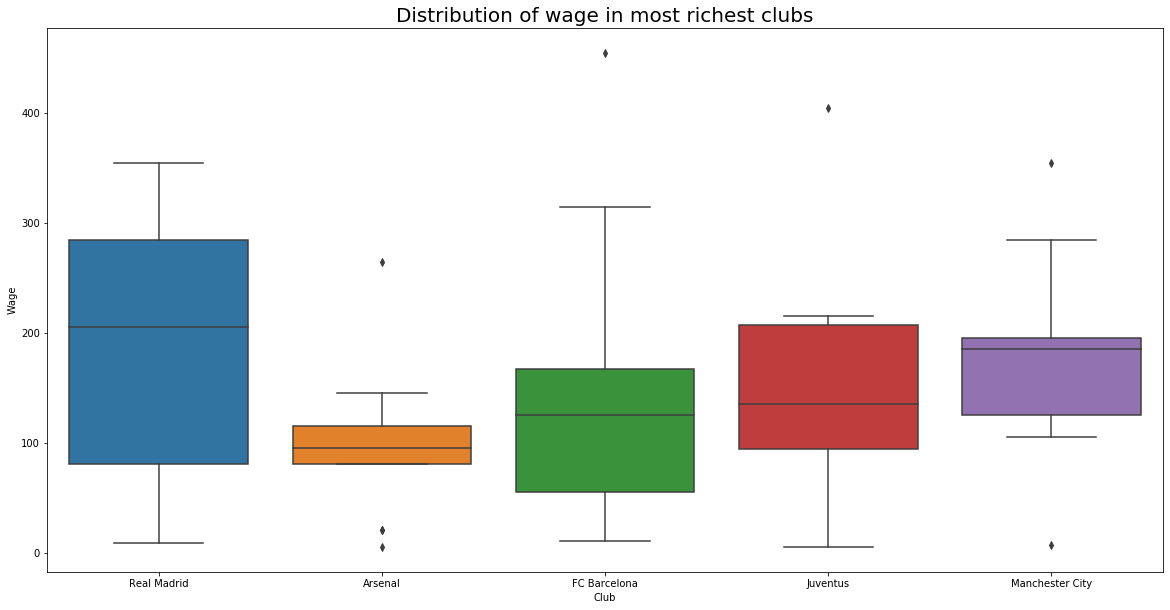

In [19]:
some_clubs = ('FC Barcelona', 'Real Madrid', 'Arsenal', 'Manchester City', 'Juventus')
df_club = df.loc[df['Club'].isin(some_clubs) & df['Wage']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxplot(x="Club", y="Wage", data=df_club);
ax.set_title(label='Distribution of wage in most richest clubs', fontsize=20);

The `Club` information is one of the most important attributes affecting the `Wage`, however, some clubs like Real Madrid have a high variance on wage. Therefore, we need to take other attributes into consideration.

This is not only true for rich clubs but also for any random subset of clubs. 

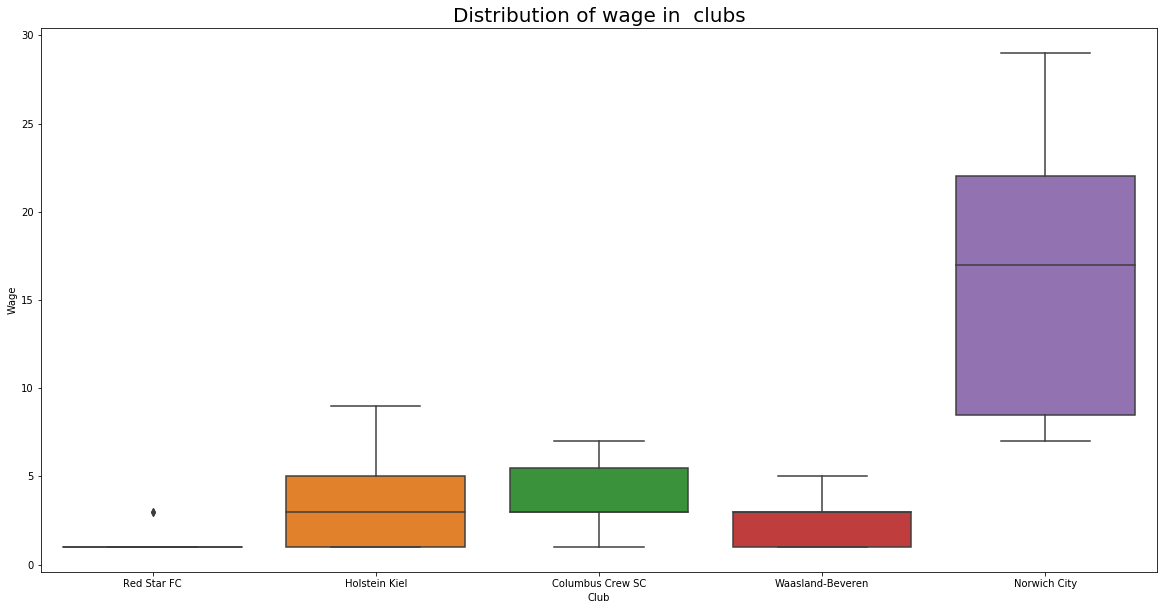

In [20]:
random_clubs = tuple(df['Club'].sample(n=5, random_state= 20))
df_club = df.loc[df['Club'].isin(random_clubs) & df['Wage']]

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax = sns.boxplot(x="Club", y="Wage", data=df_club);
ax.set_title(label='Distribution of wage in  clubs', fontsize=20);